# I.Load the data and data cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Kiểm tra có phần tử nào bị null hay không**

In [ ]:
df.isna().sum()

Category    0
Message     0
dtype: int64

**Kiểm tra duplicate value**

In [ ]:
print("Có",df.duplicated().sum(),"giá trị lặp lại")

Có 415 giá trị lặp lại


**Loại bỏ duplicate**

In [ ]:
df = df.drop_duplicates(keep = 'first')

Keep = 'first' giữ lại phần tử đầu tiên của các phần tử duplicate

**Mã hóa one-hot**

In [ ]:
df['Spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.drop(columns=['Category'], inplace=True)
df.head()

<ipython-input-40-1f101c6a6b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
<ipython-input-40-1f101c6a6b9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Category'], inplace=True)


,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


**Đếm giá trị 0 và 1 trên tổng các giá trị**

In [ ]:
# Tính tổng các giá trị trong cột 'Spam' mà có giá trị bằng 1
total_spam = df['Spam'].sum()
# Tính tổng số hàng trong DataFrame
total_rows = len(df)
# Tính tỷ lệ giá trị 'Spam' bằng 1 trên tổng số giá trị 0 và 1
spam_ratio = total_spam / total_rows
print("Tỷ lệ giá trị 'Spam' là:", spam_ratio)
print("Tỷ lệ giá trị không Spam là: ",1-spam_ratio)

Tỷ lệ giá trị 'Spam' là: 0.124297071941051
Tỷ lệ giá trị không Spam là:  0.875702928058949


# 2.EDA

**Vẽ biểu đồ tròn giữa 2 giá trị spam và ham**

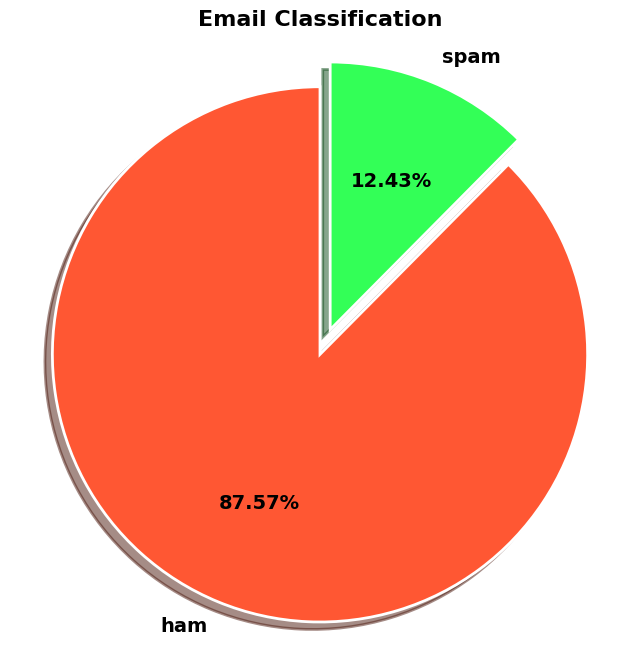

In [ ]:
import matplotlib.pyplot as plt
values = [1-spam_ratio, spam_ratio]

# Định nghĩa kiểu màu
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

**Phân tích độ dài và cấu trúc của văn bản**

In [ ]:
pip install --user -U nltk

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk

# Đếm số kí tự có trong mỗi câu
df['num_characters'] = df['Message'].apply(len)
# Đếm số từ trong mỗi câu
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
# Đếm số câu trong mỗi đoạn văn
df['num_sentence'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df.head()

,Message,Spam,num_characters,num_words,num_sentence
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


**Thống kê về email hợp lệ**

In [ ]:
df[df['Spam'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**Thống kê về email spam**

In [ ]:
df[df['Spam'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


**Phân phối về độ dài của kí tự giữa email spam và không spam**

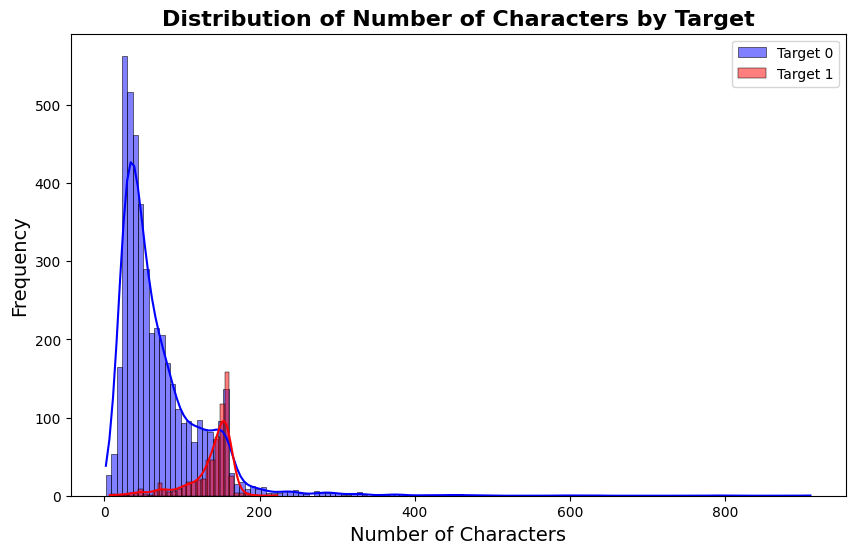

In [ ]:
import seaborn as sns
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))
# Plot the histogram for target 0 in blue
sns.histplot(df[df['Spam'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['Spam'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

Phân phối của số từ giữa email spam và không spam

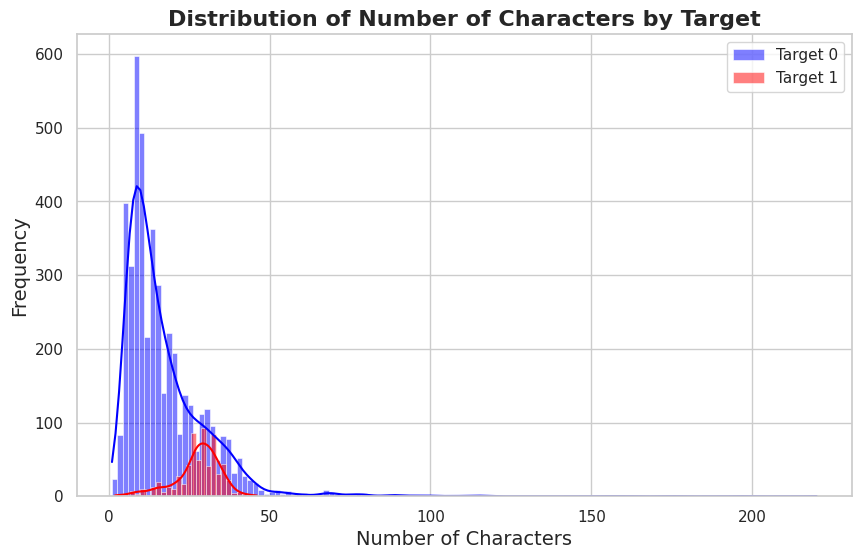

In [ ]:
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))
# Plot the histogram for target 0 in blue
sns.histplot(df[df['Spam'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['Spam'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

**PairPlot cho trực quan hóa dữ liệu**

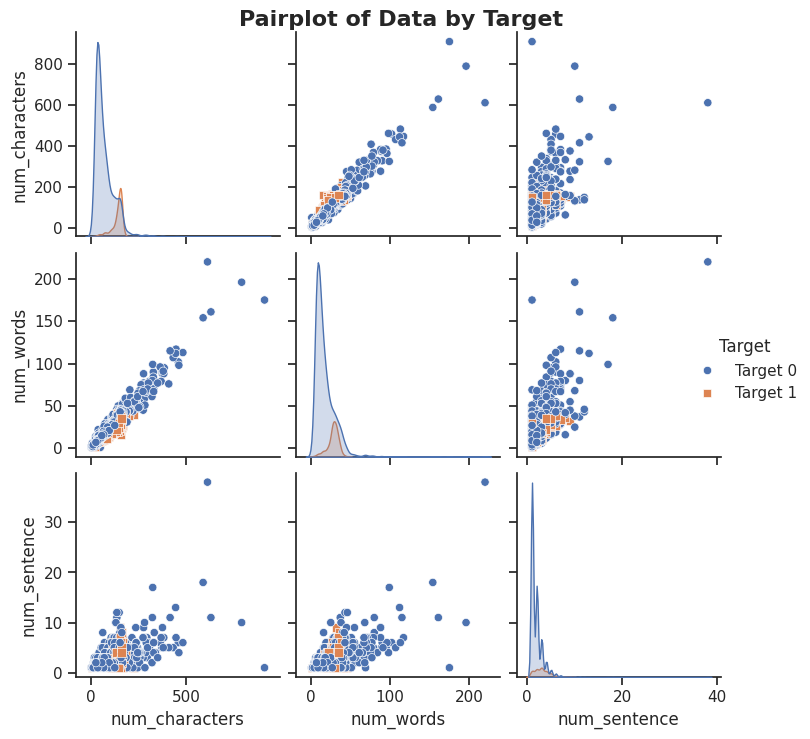

In [ ]:
# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='Spam', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

**Tương quan ( corr)**

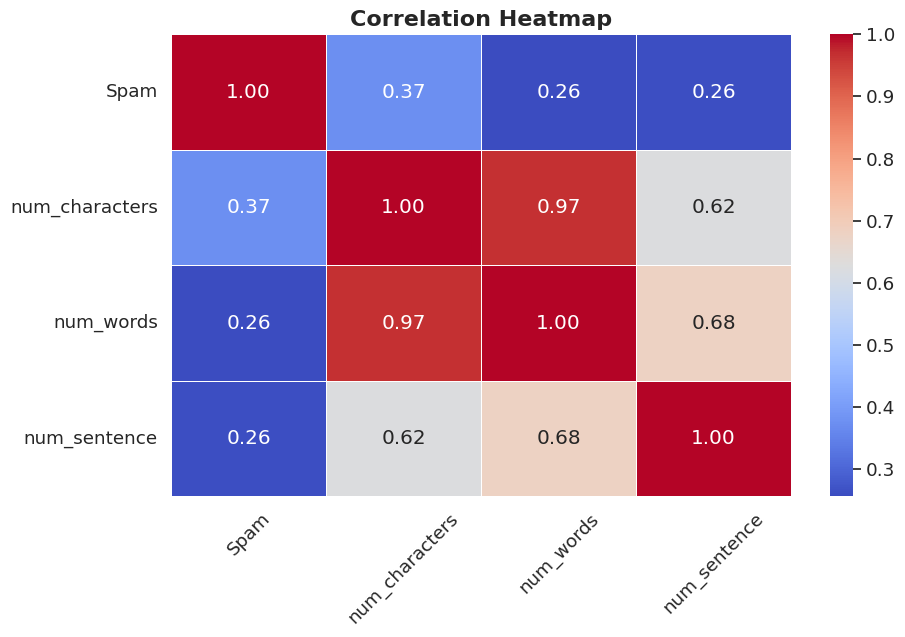

In [ ]:
# Select the columns for the correlation matrix
correlation_matrix = df[['Spam', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show the heatmap
plt.show()

# III. Data preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Importing NLTK
import nltk
from nltk.corpus import stopwords

# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)


In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

**Tạo columns mới**

In [ ]:
# Applying text transformation to a column named 'Message' and storing the transformed text in a new column named 'transformed_text'
df['transformed_text'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

,Message,Spam,num_characters,num_words,num_sentence,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


**Tìm top 30 từ spam nhiều nhất**

<ipython-input-78-624a37d72f62>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


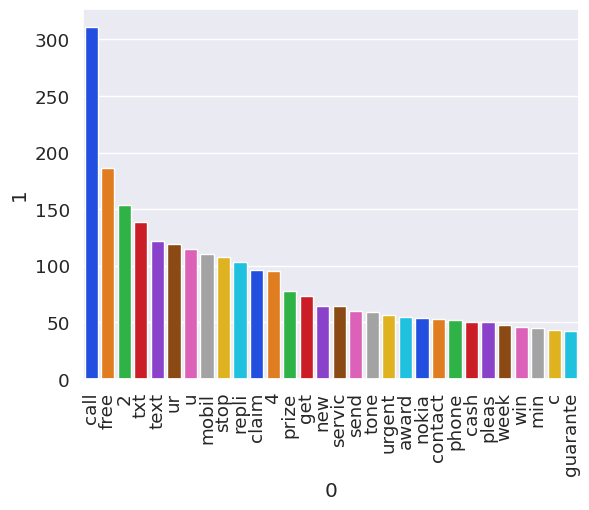

In [ ]:

from collections import Counter
spam_carpos = []
for sentence in df[df['Spam'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

Top 30 từ xuất hiện nhiều nhất trong email không spam

<ipython-input-79-2f9dce20c2b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


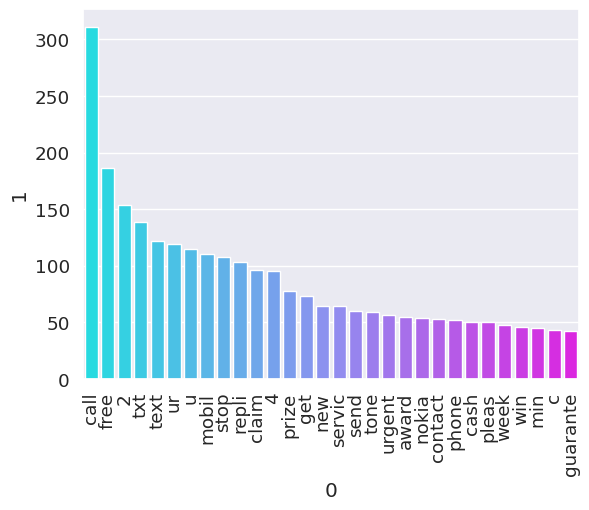

In [ ]:
ham_carpos = []
for sentence in df[df['Spam'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

# IV.Model Building

**Khởi tạo CountVectorizer và TfidfVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

**Xác định features và lable**

In [ ]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['Spam'].values

**Chia train và test theo tỷ lệ 20-80**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

**Import các model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

**Khởi tạo model**

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

**Từ điển hóa tên mô hình**

In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

**Train và đưa ra accuracy của model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [ ]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9757751937984496
Precision:  0.9811320754716981

For:  KNN
Accuracy:  0.9127906976744186
Precision:  1.0

For:  NB
Accuracy:  0.9709302325581395
Precision:  1.0

For:  DT
Accuracy:  0.936046511627907
Precision:  0.8210526315789474

For:  LR
Accuracy:  0.9583333333333334
Precision:  0.9375

For:  RF
Accuracy:  0.9728682170542635
Precision:  1.0

For:  Adaboost
Accuracy:  0.9660852713178295
Precision:  0.9423076923076923

For:  Bgc
Accuracy:  0.9612403100775194
Precision:  0.8918918918918919

For:  ETC
Accuracy:  0.9777131782945736
Precision:  0.9905660377358491

For:  GBDT
Accuracy:  0.9554263565891473
Precision:  0.9764705882352941

For:  xgb
Accuracy:  0.9728682170542635
Precision:  0.9714285714285714
